# **Chimp Buddies Simulated Interface to the Chimp Bridge Al MarketpIace**



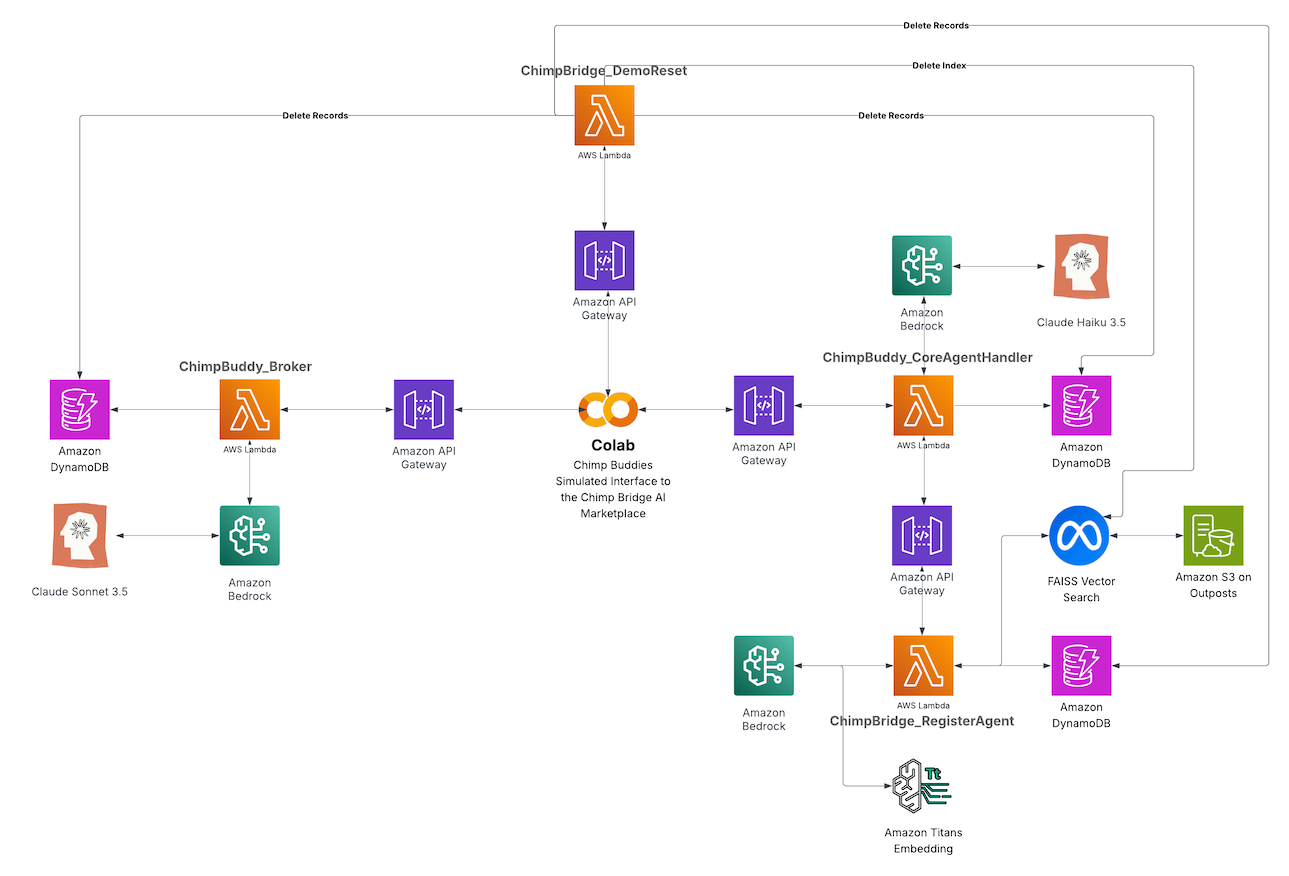

🐒 ChimpBridge AI Agent Marketplace – System Overview

🏗️ Architecture Components

CoreAgentHandler (Claude Haiku) – Extracts structured agent data from free-form text; registers profiles in DynamoDB (ChimpBuddy_AgentRegistry).

RegisterAgent (Titan Embeddings + FAISS) – Converts agent descriptions into 1536-dim embeddings; performs semantic search in FAISS (S3); manages global registry in DynamoDB (ChimpBridge_AgentRegistry).

Broker (Claude Sonnet) – Conducts autonomous peer-to-peer negotiations; tracks state/history in DynamoDB (ChimpBuddy_Negotiations).

DemoReset – Utility Lambda that clears DynamoDB tables + FAISS index for clean demos.

🤖 AI Integration

Claude Haiku → Profile extraction

Titan Embeddings → Semantic matching

Claude Sonnet → Negotiations

🗄️ Data Architecture

DynamoDB: Profiles, Marketplace, Negotiations

FAISS on S3: Vector search (1536-dim)

🔮 MCP Readiness

✅ Structured profiles

✅ Vector search + similarity scoring

✅ Negotiation state mgmt

✅ REST APIs for external integration

### **Load libraries and define register agent function**

### **Please run all the cell sequentially for the demo and make sure you reset the demo have each test by running 'Reset Demo'**

In [11]:
import requests
import json
import time

# Endpoint
endpoint = "https://ncocbp02eh.execute-api.us-east-1.amazonaws.com/default/ChimpBuddy_CoreAgentHandler"

# Function to send request
def register_agent(payload):
    response = requests.post(endpoint, headers={"Content-Type": "application/json"}, data=json.dumps(payload))
    print(f"Status: {response.status_code}")
    result = response.json()
    print("Response:", result)
    return result

### **Reset all the data**



In [12]:
# =============================================================================
# DEMO RESET CELL - Run this to clear all data for fresh demo
# =============================================================================

print("🔄 RESETTING CHIMPBRIDGE AI AGENT MARKETPLACE")
print("=" * 50)

reset_url = "https://6tekwkwbpc.execute-api.us-east-1.amazonaws.com/default/ChimpBridge_DemoReset"

try:
    response = requests.get(reset_url)

    if response.status_code == 200:
        result = response.json()

        print("✅ RESET SUCCESSFUL!")
        print(f"📊 Status: {result['status']}")
        print(f"💬 Message: {result['message']}")

        print("\n📋 Tables Reset:")
        for table in result['tables']:
            status_emoji = "✅" if table['status'] in ['empty', 'cleared'] else "❌"
            print(f"  {status_emoji} {table['table']}: {table['status']} ({table['count']} items)")

        faiss_status = result['faiss'].get('faiss', 'unknown')
        faiss_emoji = "✅" if faiss_status in ['empty', 'deleted'] else "⚠️"
        print(f"\n🔍 FAISS Index: {faiss_emoji} {faiss_status}")

        print(f"\n🎯 DEMO ENVIRONMENT IS READY!")
        print("Run the agent registration and negotiation cells now.")

    else:
        print(f"❌ Reset failed with status {response.status_code}")
        print(f"Response: {response.text}")

except Exception as e:
    print(f"❌ Error calling reset API: {str(e)}")


🔄 RESETTING CHIMPBRIDGE AI AGENT MARKETPLACE
✅ RESET SUCCESSFUL!
📊 Status: success
💬 Message: ChimpBridge AI Agent Marketplace Reset Complete

📋 Tables Reset:
  ✅ ChimpBuddy_AgentRegistry: cleared (2 items)
  ✅ ChimpBridge_AgentRegistry: cleared (2 items)
  ✅ ChimpBuddy_Negotiations: cleared (1 items)

🔍 FAISS Index: ✅ deleted

🎯 DEMO ENVIRONMENT IS READY!
Run the agent registration and negotiation cells now.


### **Register the Sales Agent**


In [13]:
# Seller payload
seller_payload = {
    "ClientID": "brett_test_seller",
    "AppID": "GENERIC_AGENT_V1",
    "AgentName": "LeafsTicketSeller",
    "AgentType": "Seller",
    "Description": (
        "This agent has 2 premium tickets to sell for the Leafs home opener, located in Section 108 near center ice. "
        "Seats offer an unobstructed view and are priced competitively."
    ),
    "Services": ["Ticket Listing"],
    "Pricing": {"Min": 275, "Max": 300}
}

print("\nRegistering Seller Agent:")
seller_response=register_agent(seller_payload)
print(seller_response)


Registering Seller Agent:
Status: 200
Response: {'ClientID': 'brett_test_seller', 'Updated': True, 'Matches': [], 'ProfileComplete': True, 'MatchStatusMessage': 'Found 0 trading partner(s) via ChimpBridge marketplace.', 'BridgeStatus': 'Registered successfully', 'ExtractedProfile': {'Description': 'This agent has 2 premium tickets to sell for the Leafs home opener, located in Section 108 near center ice. Seats offer an unobstructed view and are priced competitively.', 'Services': ['Ticket Listing'], 'Pricing': {'Min': 275, 'Max': 300}, 'Name': 'LeafsTicketSeller', 'Quantity': 2, 'Item': 'Leafs home opener tickets in Section 108 near center ice', 'AskingPrice': 275, 'BridgeUUID': 'cc574f51-793d-4bbd-804b-da132258baf4'}, 'TradingPartners': 0, 'NextStep': 'register_agent'}
{'ClientID': 'brett_test_seller', 'Updated': True, 'Matches': [], 'ProfileComplete': True, 'MatchStatusMessage': 'Found 0 trading partner(s) via ChimpBridge marketplace.', 'BridgeStatus': 'Registered successfully', 'Ex

### **Register the Client Agent**

In [14]:
# Buyer payload
buyer_payload = {
    "ClientID": "brett_test_buyer",
    "AppID": "GENERIC_AGENT_V1",
    "AgentName": "LeafsTicketSeeker",
    "AgentType": "Buyer",
    "Description": (
        "This agent specializes in locating great-value tickets for the Toronto Maple Leafs home opener in 2025. "
        "It prioritizes unobstructed views, a budget of $200–$300 per ticket, and flexible seating preferences "
        "including behind the goalie, corners, or centre ice if reasonably priced."
    ),
    "Services": ["Ticket Search"],
    "Pricing": {"Min": 200, "Max": 300}
}

print("Registering Buyer Agent:")
buyer_response=register_agent(buyer_payload)
print(buyer_response)

Registering Buyer Agent:
Status: 200
Response: {'ClientID': 'brett_test_buyer', 'Updated': True, 'Matches': [{'AgentID': 'cc574f51-793d-4bbd-804b-da132258baf4', 'AgentName': 'LeafsTicketSeller', 'AgentType': 'Seller', 'Description': 'This agent has 2 premium tickets to sell for the Leafs home opener, located in Section 108 near center ice. Seats offer an unobstructed view and are priced competitively.', 'Services': ['Ticket Listing'], 'Pricing': {'Max': 300.0, 'Min': 275.0}, 'Endpoint': 'https://57s0ipuwi5.execute-api.us-east-1.amazonaws.com/default/ChimpBuddy_Broker?ClientID=brett_test_seller', 'Similarity': 1.0, 'MatchType': 'POTENTIAL_TRADE_PARTNER'}], 'ProfileComplete': True, 'MatchStatusMessage': 'Found 1 trading partner(s) via ChimpBridge marketplace.', 'BridgeStatus': 'Registered successfully', 'ExtractedProfile': {'Description': 'This agent specializes in locating great-value tickets for the Toronto Maple Leafs home opener in 2025. It prioritizes unobstructed views, a budget of

### **Negotiate only if a match is made**



In [15]:
# =============================================================================
# AI-DRIVEN AUTONOMOUS NEGOTIATION (NO HARDCODED MESSAGES!)
# =============================================================================

print("🧠 AI AGENTS THINKING AND NEGOTIATING AUTONOMOUSLY")
print("=" * 60)

# Extract match data from previous cell
seller_match = buyer_response['Matches'][0]
buyer_profile = buyer_response['ExtractedProfile']
seller_endpoint = seller_match['Endpoint']

# Create buyer's endpoint for peer-to-peer communication
buyer_endpoint = seller_endpoint.replace('brett_test_seller', buyer_response['ClientID'])

print("🤖 Setting up AI-to-AI negotiation...")
print(f"🔍 Buyer AI: {buyer_response['ClientID']}")
print(f"🎫 Seller AI: {seller_match['AgentID']}")
print(f"🎯 Match Similarity: {seller_match['Similarity']:.1%}")

# Use AI to generate intelligent opening based on both profiles
smart_initiate_payload = {
    "action": "initiate_smart",
    "buyer_profile": buyer_profile,
    "seller_profile": {
        "description": seller_match['Description'],
        "pricing": seller_match['Pricing'],
        "services": seller_match.get('Services', [])
    },
    "counterpart_id": buyer_response['ClientID']
}

print("\n🧠 BUYER AI analyzing seller profile and crafting opening message...")
time.sleep(2)

# Initiate with AI-generated opening
response = requests.post(seller_endpoint,
                        headers={"Content-Type": "application/json"},
                        data=json.dumps(smart_initiate_payload))

if response.status_code != 200:
    print(f"❌ Error initiating negotiation: {response.text}")
else:
    negotiation_start = response.json()
    negotiation_id = negotiation_start['negotiation_id']

    print(f"\n💬 BUYER AI OPENING (Generated by AI):")
    print(f"🤖 \"{smart_initiate_payload.get('generated_message', 'AI analyzing...')}\"")

    print(f"\n💬 SELLER AI RESPONSE (Generated by Claude):")
    print(f"🤖 \"{negotiation_start['response']}\"")
    print(f"🎯 Action: {negotiation_start['action'].upper()}")
    print(f"💰 Counter-Price: ${negotiation_start['price_per_ticket']} per ticket")
    print(f"🧠 AI Reasoning: {negotiation_start['reasoning']}")

    # Continue negotiation with AI-driven responses
    print(f"\n🔄 CONTINUING AI-TO-AI NEGOTIATION...")
    print("=" * 50)

    current_price = negotiation_start['price_per_ticket']
    round_count = 1
    max_rounds = 5

    while (negotiation_start['action'] not in ['accept', 'reject'] and
           round_count < max_rounds):

        round_count += 1
        print(f"\n🔄 ROUND {round_count}: BUYER AI THINKING...")

        # Buyer AI responds to seller's counter
        buyer_negotiate_payload = {
            "action": "negotiate",
            "negotiation_id": negotiation_id,
            "message": f"AI analyzing seller's ${current_price} counter-offer..."  # AI will generate actual message
        }

        time.sleep(1)
        buyer_response_req = requests.post(buyer_endpoint,
                                         headers={"Content-Type": "application/json"},
                                         data=json.dumps(buyer_negotiate_payload))

        if buyer_response_req.status_code == 200:
            buyer_nego_response = buyer_response_req.json()

            print(f"💬 BUYER AI RESPONSE:")
            print(f"🤖 \"{buyer_nego_response['response']}\"")
            print(f"🎯 Action: {buyer_nego_response['action'].upper()}")
            print(f"💰 Counter-Price: ${buyer_nego_response['price_per_ticket']} per ticket")
            print(f"🧠 AI Reasoning: {buyer_nego_response['reasoning']}")

            if buyer_nego_response['action'] in ['accept', 'reject']:
                print(f"\n🎉 NEGOTIATION CONCLUDED: {buyer_nego_response['action'].upper()}")
                if buyer_nego_response['action'] == 'accept':
                    print(f"✅ DEAL AGREED: ${buyer_nego_response['price_per_ticket']} per ticket")
                else:
                    print("❌ NO DEAL REACHED")
                break

            # Seller AI responds
            print(f"\n🔄 ROUND {round_count}: SELLER AI THINKING...")
            current_price = buyer_nego_response['price_per_ticket']

            seller_negotiate_payload = {
                "action": "negotiate",
                "negotiation_id": negotiation_id,
                "message": f"AI analyzing buyer's ${current_price} counter-offer..."  # AI will generate actual message
            }

            time.sleep(1)
            seller_response_req = requests.post(seller_endpoint,
                                              headers={"Content-Type": "application/json"},
                                              data=json.dumps(seller_negotiate_payload))

            if seller_response_req.status_code == 200:
                seller_nego_response = seller_response_req.json()

                print(f"💬 SELLER AI RESPONSE:")
                print(f"🤖 \"{seller_nego_response['response']}\"")
                print(f"🎯 Action: {seller_nego_response['action'].upper()}")
                print(f"💰 Counter-Price: ${seller_nego_response['price_per_ticket']} per ticket")
                print(f"🧠 AI Reasoning: {seller_nego_response['reasoning']}")

                if seller_nego_response['action'] in ['accept', 'reject']:
                    print(f"\n🎉 NEGOTIATION CONCLUDED: {seller_nego_response['action'].upper()}")
                    if seller_nego_response['action'] == 'accept':
                        print(f"✅ DEAL AGREED: ${seller_nego_response['price_per_ticket']} per ticket")
                    else:
                        print("❌ NO DEAL REACHED")
                    break

                current_price = seller_nego_response['price_per_ticket']
                negotiation_start = seller_nego_response  # Update for next iteration
            else:
                print(f"❌ Seller negotiation error: {seller_response_req.text}")
                break
        else:
            print(f"❌ Buyer negotiation error: {buyer_response_req.text}")
            break

    if round_count >= max_rounds:
        print(f"\n⏰ NEGOTIATION TIMEOUT: Reached maximum {max_rounds} rounds")
        print("🤝 AI agents could continue negotiating with more rounds...")

print(f"\n🎯 AUTONOMOUS AI NEGOTIATION COMPLETE!")
print("🧠 All messages were generated by AI - no hardcoded responses!")

🧠 AI AGENTS THINKING AND NEGOTIATING AUTONOMOUSLY
🤖 Setting up AI-to-AI negotiation...
🔍 Buyer AI: brett_test_buyer
🎫 Seller AI: cc574f51-793d-4bbd-804b-da132258baf4
🎯 Match Similarity: 100.0%

🧠 BUYER AI analyzing seller profile and crafting opening message...

💬 BUYER AI OPENING (Generated by AI):
🤖 "AI analyzing..."

💬 SELLER AI RESPONSE (Generated by Claude):
🤖 "Thank you for your interest in these premium Leafs home opener tickets! I appreciate your enthusiasm as a fellow hockey fan. These seats in Section 108 near center ice truly offer an exceptional view of the action. While I understand you're working with a budget, these tickets are already priced competitively for their prime location and unobstructed sightlines. However, I'm open to a bit of negotiation to find a win-win solution. I can offer the pair at $290 per ticket, which is a slight discount from our usual price. This represents great value for such sought-after seats at the season opener. What do you think about this